In [1]:
%matplotlib inline
import numpy as np
import random

random.seed(0)
np.random.seed(0)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.mixture import GaussianMixture
import scipy.stats as stats
import scipy
from scipy import interpolate

In [2]:
def calc_sigma(x, all):
    return stats.norm.ppf((x-0.3)/(all+0.4))

def calc_cdf_from_sigma(sigmas):
    return stats.norm.cdf(sigmas)

def calc_pdf_from_cdf(cdf):
    pdf = cdf[1:] - cdf[:-1]
    return np.append(pdf, pdf[-1])

def calc_sigmas(x):
    hist, bin_edges = np.histogram(x,bins=2000)
    cumsum_counts = np.cumsum(hist)
    sigmas = calc_sigma(cumsum_counts, cumsum_counts[-1])
    x = np.mean(np.stack([bin_edges[:-1], bin_edges[1:]], axis=1), axis=1)
    return x, sigmas


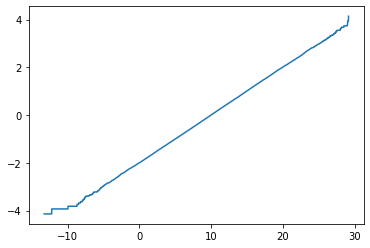

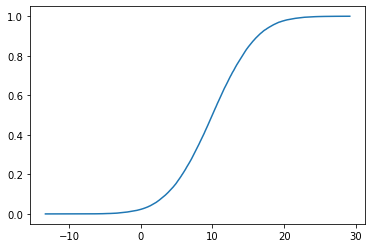

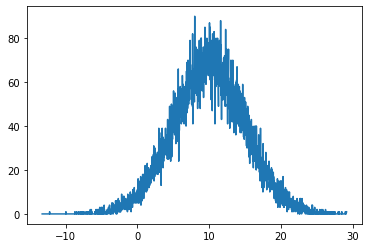

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-13.29976484, -13.27853548, -13.25730612, ...,  29.1164921 ,
         29.13772145,  29.15895081]),
 <BarContainer object of 2000 artists>)

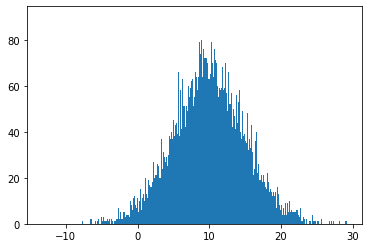

In [3]:
y = np.random.normal(loc=10, scale=5, size=40000)
x, sigmas = calc_sigmas(y)
plt.plot(x, sigmas)
plt.show()
cdf = calc_cdf_from_sigma(sigmas)
plt.plot(x, cdf)
plt.show()
pdf = calc_pdf_from_cdf(cdf)
plt.plot(x, pdf*40000)
plt.show()
plt.hist(y, bins=2000)

In [4]:
def spline1(x,y,point):
    f = interpolate.Akima1DInterpolator(x, y) 
    X = np.linspace(x[0],x[-1],num=point,endpoint=True)
    Y = f(X)
    return X,Y

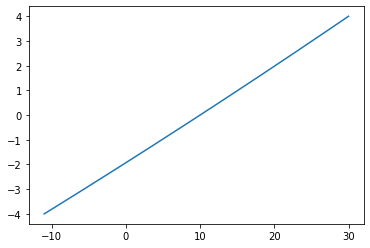

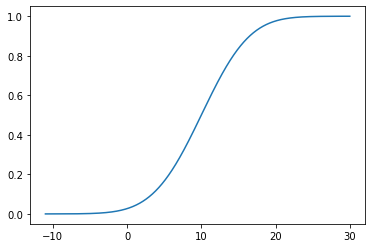

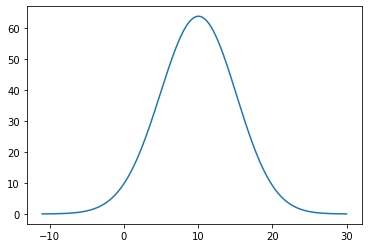

In [5]:
points_y = [-4, 0, 4]
points_x = [-11, 10, 30]
x, sigmas = spline1(points_x, points_y, 2000)
plt.plot(x, sigmas)
cdf = calc_cdf_from_sigma(sigmas)
plt.show()
plt.plot(x, cdf)
plt.show()
pdf = calc_pdf_from_cdf(cdf)
plt.plot(x, pdf*40000)
plt.show()

[-10.          -9.97998999  -9.95997999 ...  29.95997999  29.97998999
  30.        ]


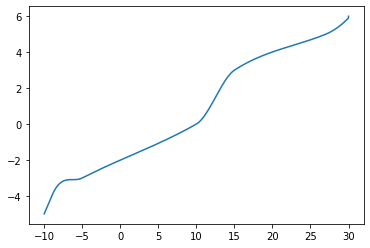

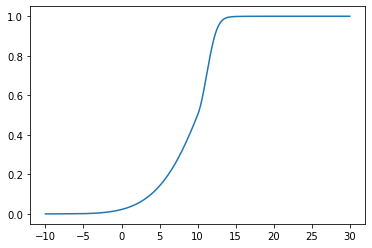

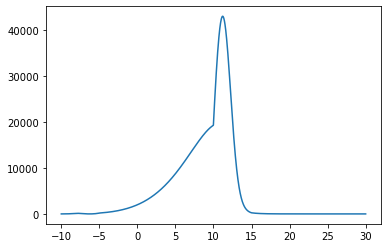

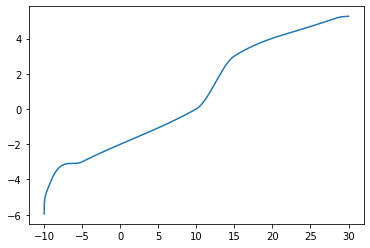

In [6]:
points_y = [ -5, -4.9, -4, -3,  0,  3,  5,   5.9,  6]
points_x = [-10, -9.9, -9, -5, 10, 15, 27, 29.99, 30]
x, sigmas = spline1(points_x, points_y, 2000)
print(x)
plt.plot(x, sigmas)
cdf = calc_cdf_from_sigma(sigmas)
plt.show()
plt.plot(x, cdf)
plt.show()
pdf = calc_pdf_from_cdf(cdf)
y = pdf*10000000
plt.plot(x, y)
plt.show()
y_cumsum = np.cumsum(y)
sigmas = calc_sigma(y_cumsum, y_cumsum[-1])
plt.plot(x, sigmas)
plt.show()

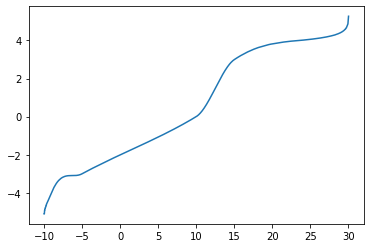

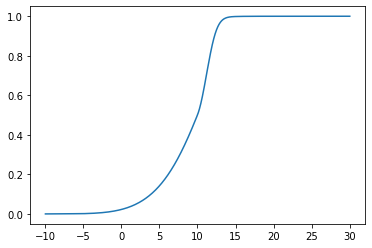

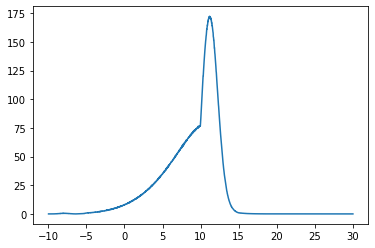

(array([2., 0., 1., ..., 1., 1., 1.]),
 array([-9.98878169, -9.96877861, -9.94877552, ..., 29.97738257,
        29.99738566, 30.01738874]),
 <BarContainer object of 2000 artists>)

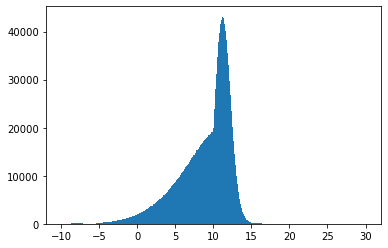

In [7]:
data = np.zeros(0)
delta = x[1] - x[0]
for i in range(2000):
    sanples = np.random.rand(int(np.ceil(y[i])))*(delta)+x[i]
    data = np.append(data, sanples)

x, sigmas = calc_sigmas(data)
plt.plot(x, sigmas)
plt.show()
cdf = calc_cdf_from_sigma(sigmas)
plt.plot(x, cdf)
plt.show()
pdf = calc_pdf_from_cdf(cdf)
plt.plot(x, pdf*40000)
plt.show()
plt.hist(data, bins=2000)

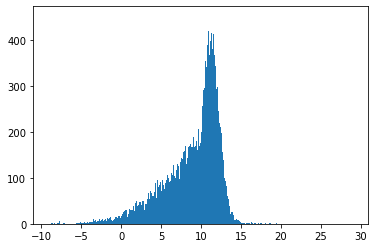

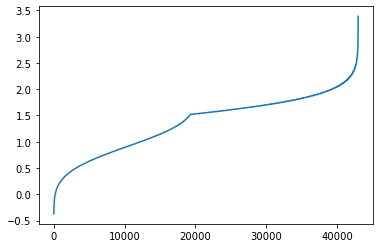

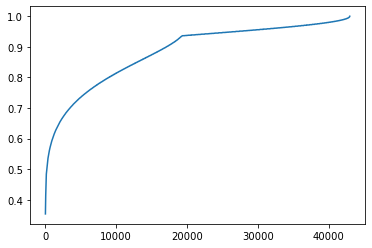

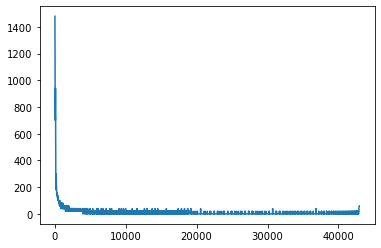

(array([709.,  74.,  48., ...,   1.,   2.,   3.]),
 array([-3.26351901e-01,  2.11521741e+01,  4.26307002e+01, ...,
         4.29137687e+04,  4.29352472e+04,  4.29567257e+04]),
 <BarContainer object of 2000 artists>)

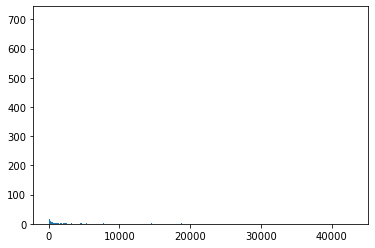

In [8]:
def p(sample):
    indexs = np.where(x > sample)
    return pdf[indexs[0][0]]

# 棄却サンプリング
def sampling():
    k = 2
    # 採択するまでループ
    while True:
        # 提案分布q(z)からサンプリング
        z = np.random.uniform(x[0], x[-1])
        # [0,kq(z)]の一様分布からサンプリング
        u = k*np.random.uniform(0, 0.5)
        # 棄却するか判定
        p_ret = p(z)
        if p_ret > u:
            return z

samples = np.array([sampling() for i in range(100000)])
plt.hist(samples, 2000)
plt.show()

x, sigmas = calc_sigmas(y)
plt.plot(x, sigmas)
plt.show()
cdf = calc_cdf_from_sigma(sigmas)
plt.plot(x, cdf)
plt.show()
pdf = calc_pdf_from_cdf(cdf)
plt.plot(x, pdf*40000)
plt.show()
plt.hist(y, bins=2000)

In [9]:
#from scipy import stats
#import math

#class gaussian(stats.rv_continuous):
#    def _pdf(self, sample, mu, sigma):
#        indexs = np.where(x > sample)
#        if len(indexs[0]) == 0:
#            return 0
#        return pdf[indexs[0][0]]

#gaussian = gaussian(name="gaussian", a=0.0)
#sample_from_gaussian = gaussian.rvs(size=1, mu=10.0, sigma=1.0)
#plt.hist(sample_from_gaussian)